In [2]:
import json
import glob
import os

SERVER_PATH = '/home/it/Desktop/PAM2060/server'
BASE_PATH = os.path.dirname(SERVER_PATH)
VISION_PATH = os.path.join(SERVER_PATH, 'vision')
DATASET_PATH = os.path.join(BASE_PATH, 'dataset')
SRC_DATA = os.path.join(VISION_PATH, 'annotaion.json')


def load_data():
    with open(SRC_DATA) as f:
        data = json.loads(f.read())
    return data



component = 'dosing'
node = 102
datasets = glob.glob(DATASET_PATH + f'/{component}_{node}_*')
data = load_data()
l = [tuple(i.split('/')[-1].split('_')[:-1]) for i in datasets]
for component, node, dataset_name in l:
    print(dataset_name)
print(datasets)




esrla8ym
['/home/it/Desktop/PAM2060/dataset/dosing_102_esrla8ym_192.168.44.102']


In [3]:
import cv2

dataset = datasets[0]
images = glob.glob(dataset + '/*.png')
images.sort()
images = [cv2.imread(i) for i in images]

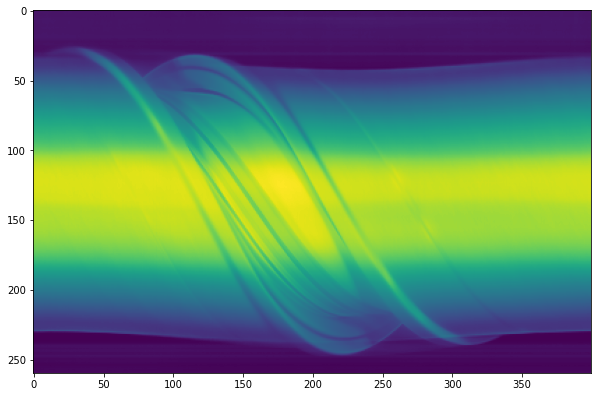

In [4]:
import matplotlib.pyplot as plt
import numpy as np

cropped = [i[100:360,300:550,:].mean(axis=2).mean(axis=1) for i in images]
cropped = np.stack(cropped, axis=1)
# print(cropped.shape)
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(cropped)


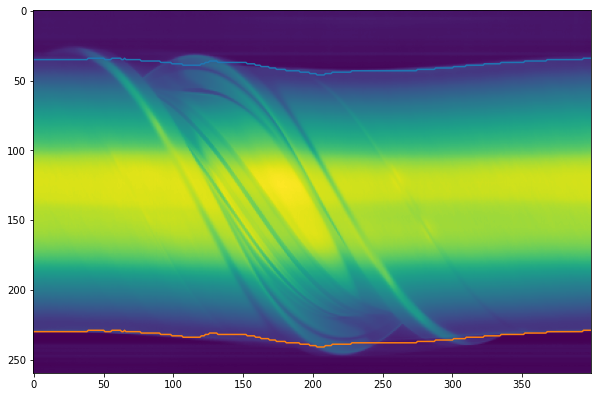

In [5]:
zero = 171
back = (zero + 200) % 400
back = cropped[:, back]

cv = np.array([np.argmax(np.convolve(back, cropped[:, i], mode='same')) for i in range(400)])
cv3 = [np.convolve(back, cropped[:, i], mode='same') for i in range(400)]
cv1 = cv - 100
cv2 = cv + 95
plt.imshow(cropped)

plt.plot(cv1)
plt.plot(cv2)


(260,) (260,) 130


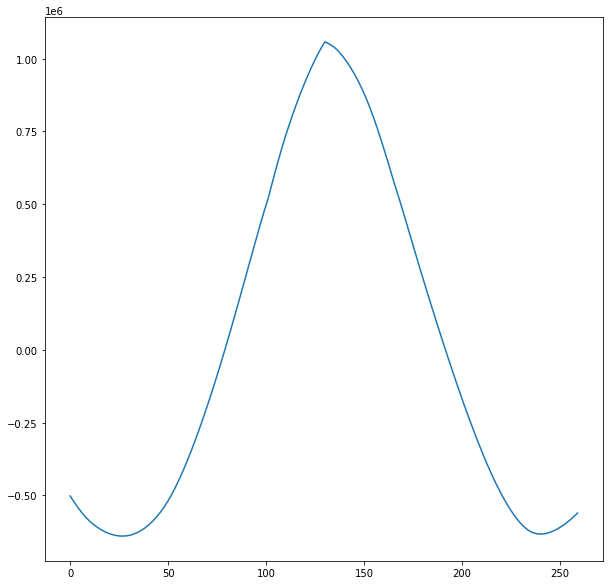

In [19]:
z = back[:]
z = z - z.mean()
a = np.convolve(z, z, mode='same')
b = np.argmax(a)
print(a.shape, z.shape, b)
plt.plot(a)